In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("tqqq.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-02-11,4.8800,5.2165,4.8650,5.1875,287964,0
1,2010-02-12,5.0475,5.2540,5.0175,5.2100,716790,0
2,2010-02-16,5.3315,5.4240,5.2490,5.4115,801658,0
3,2010-02-17,5.4840,5.5040,5.4015,5.5040,1598736,0
4,2010-02-18,5.4975,5.6415,5.4640,5.6075,3240274,0


In [ ]:
df.shape

(1952, 7)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1952.000000,1952.000000,1952.000000,1952.000000,1.952000e+03,1952.0
mean,36.186158,36.706018,35.586959,36.201748,5.906256e+06,0.0
std,29.695174,30.009167,29.305858,29.716347,3.363640e+06,0.0
min,4.580600,4.634300,4.248200,4.544300,2.879640e+05,0.0
25%,11.310000,11.495000,11.072000,11.314250,3.610530e+06,0.0
50%,28.588000,28.979000,27.987000,28.567500,5.169537e+06,0.0
75%,53.971250,54.550000,52.808750,53.871250,7.330084e+06,0.0
max,134.160000,136.054000,133.660000,135.970000,4.561731e+07,0.0


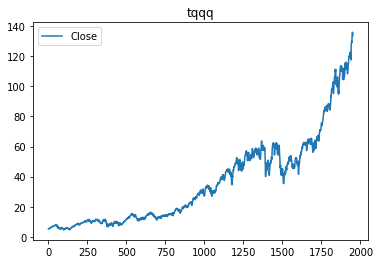

In [ ]:
df[['Close']].plot()
plt.title("tqqq")
plt.show()

Text(0.5, 1.0, 'tqqq Cumulative Return')

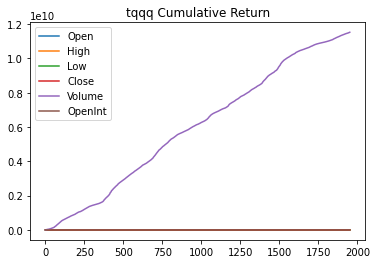

In [ ]:
#comulative return 
cr = df.cumsum()
cr.plot()
plt.title("tqqq Cumulative Return")

Text(0.5, 1.0, 'tqqq Autocorrelation Plot')

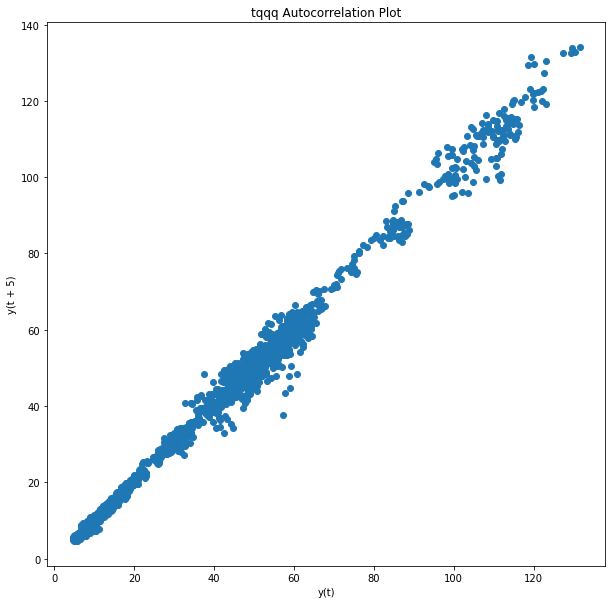

In [ ]:
from pandas.plotting import lag_plot
plt.figure(figsize = (10,10))
lag_plot(df["Open"], lag = 5)
plt.title("tqqq Autocorrelation Plot")

**ARIMA** (auto regressive integrated moving average) for time series prediction 

In [ ]:
df["Date"][1857]

'2017-06-29'

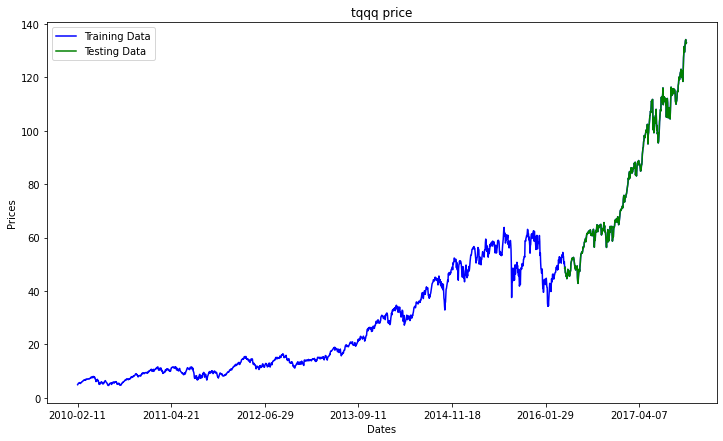

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title("tqqq price")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.plot(df["Open"], 'blue', label="Training Data")
plt.plot(test_data["Open"], 'green', label = "Testing Data")
plt.xticks(np.arange(0, 1857, 300), df["Date"][0:1867:300])
plt.legend()

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
  model = ARIMA(history, order = (5,1,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test_ar[t]
  history.append(obs)

error = mean_squared_error(test_ar, predictions)
print("Testing Mean Square Error: %.3f" % error)


<class 'list'>


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Square Error: 2.992


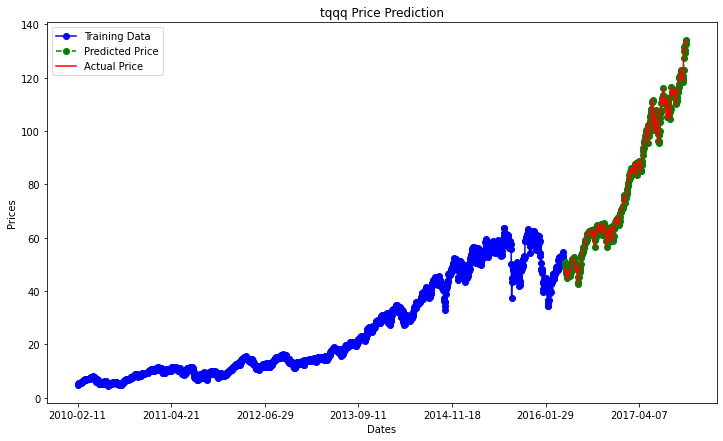

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(train_data["Open"], 'green', color = 'blue',marker = 'o', label="Training Data")

plt.plot(test_data.index, predictions,color='green',marker = 'o', linestyle='dashed', label="Predicted Price")
plt.plot(test_data.index,test_data["Open"], color = 'red', label="Actual Price")
plt.title("tqqq Price Prediction")
plt.xlabel('Dates')
plt.ylabel("Prices")
plt.xticks(np.arange(0, 1857, 300), df['Date'][0:1857:300])
plt.legend()

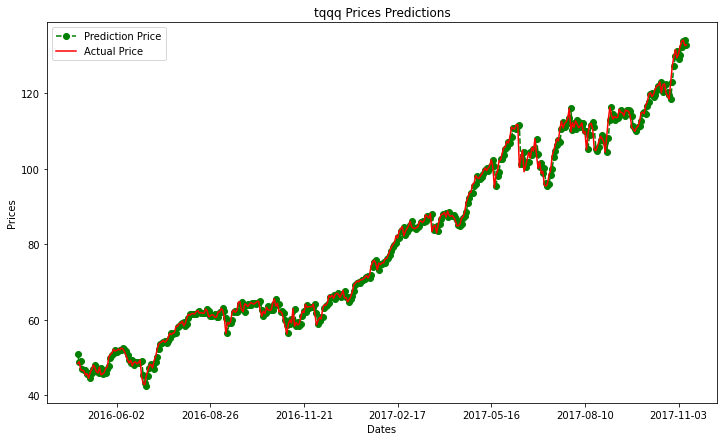

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index,predictions, color='green', marker='o', linestyle='dashed', label='Prediction Price')
plt.plot(test_data.index, test_data['Open'], color = 'red', label='Actual Price')
plt.xticks(np.arange(1586, 1952, 60), df['Date'][1586:1952:60])
plt.title("tqqq Prices Predictions")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.legend()